<a href="https://colab.research.google.com/github/Kaustubh-Atey/Codes/blob/master/Matrix_Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **In this Notebook, I will show how simple matrix multiplications can be used for image manipulations.**

---



**Convolution** is a mathematical operation on two functions (f and g) that produces a third function expressing how the shape of one is modified by the other.The general expression of a convolution is:

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/ad00478081591e8d289b7b1eba7448050acb1fed)

where  g(x,y) is the filtered image, f(x,y) is the original image, *ω* is the filter kernel. 

Every element of the filter kernel is considered by -a $\leq$ s $\leq$ a and -b 
$\leq$ t $\leq$ b  .





In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import signal
from google.colab.patches import cv2_imshow

# **Importing Image**

An image is downloaded from 'https://cs.nyu.edu/courses/spring04/V22.0480-004/images/butterfly.gray.bmp'.

Replace the link with the link of the desired image to download it.

In [243]:
!curl -o image.png https://cs.nyu.edu/courses/spring04/V22.0480-004/images/butterfly.gray.bmp
import cv2
img = cv2.imread('image.png', cv2.IMREAD_UNCHANGED)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  157k  100  157k    0     0   431k      0 --:--:-- --:--:-- --:--:--  430k


**Converting the downloaded image in grayscale.**

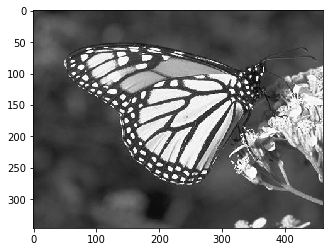

In [244]:
file_name = 'image.png'
image = Image.open(file_name).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray')
plt.show()

# **Edge Detection**

It is a mathematical method that aima at identifying points in a digital image at which the image brightness changes sharply or, more formally, has discontinuities. The points at which image brightness changes sharply are typically organized into a set of curved line segments termed **edges**.

To know more about **edge detection** function visit: https://en.wikipedia.org/wiki/Edge_detection

To detect edges in the image, three kernel are proposed. This are given by names: **'edge_detection1' ,  'edge_detection2' ,  'edge_detection3'**

In [0]:
edge_detection1 = np.array([[-1,-1, -1],
                            [-1, 8, -1],
                            [-1,-1, -1]])

edge_detection2 = np.array([[1, 0,-1],
                            [0, 0, 0],
                            [-1, 0, 1]])

edge_detection3 = np.array([[0, 1, 0],
                            [1,-4, 1],
                            [0, 1, 0]])


From **Scipy** library, **convolve2d** function is used for the purpose of convolution operation.

To know more about **convolve2d** function visit: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html


In [0]:
ed1_kernel = signal.convolve2d(arr, edge_detection1, boundary='symm', mode='same')
ed2_kernel = signal.convolve2d(arr, edge_detection2, boundary='symm', mode='same')
ed3_kernel = signal.convolve2d(arr, edge_detection3, boundary='symm', mode='same')

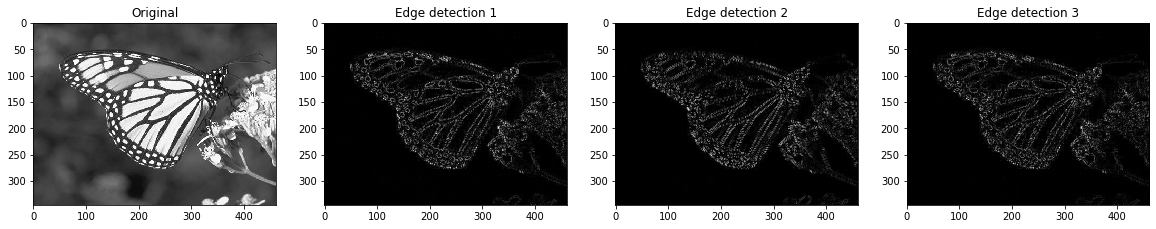

In [255]:
fig, (original, ed1, ed2, ed3) = plt.subplots(1,4, figsize= (20,6))

original.imshow(arr , cmap = 'gray')
original.set_title('Original')

ed1.imshow(np.absolute(ed1_kernel) , cmap = 'gray')
ed1.set_title('Edge detection 1')

ed2.imshow(np.absolute(ed2_kernel) , cmap = 'gray')
ed2.set_title('Edge detection 2')

ed3.imshow(np.absolute(ed3_kernel) , cmap = 'gray')
ed3.set_title('Edge detection 3')

fig.show()

On convolution of original image with edge detection kernels, the edges in the image gets highlighted.

# **Blur**

To make the original image blur,  **box blur/ box linear filter** is used. It is a spatial domain linear filter in which each pixel in the resulting image has a value equal to the average value of its neighboring pixels in the input image. It is a form of low-pass ("blurring") filter. 


To know more about **box blur**  visit: https://en.wikipedia.org/wiki/Box_blur

In [0]:
blur_kernel = 1/9 * np.ones((3,3))

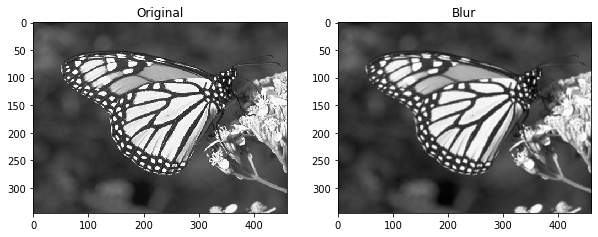

In [257]:
blur = signal.convolve2d(arr, blur_kernel, boundary='symm', mode='same')

fig, (original, blur_img) = plt.subplots(1,2, figsize= (10,6))

original.imshow(arr , cmap = 'gray')
original.set_title('Original')

blur_img.imshow(np.absolute(blur) , cmap = 'gray')
blur_img.set_title('Blur')
fig.show()

# **Sharpen**

In [0]:
sharpen_kernel = np.array([[0, -1, 0],
                          [-1, 5,-1],
                          [0, -1, 0]])

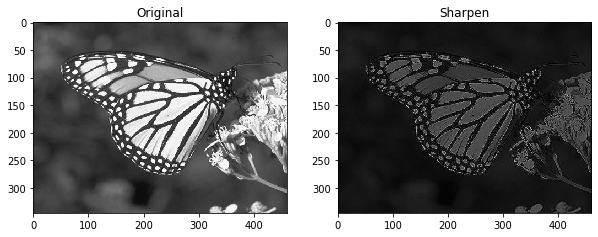

In [259]:
sharp = signal.convolve2d(arr, sharpen_kernel, boundary='symm', mode='same')

fig, (original, blur_img) = plt.subplots(1,2, figsize= (10,6))

original.imshow(arr , cmap = 'gray')
original.set_title('Original')

blur_img.imshow(np.absolute(sharp) , cmap = 'gray')
blur_img.set_title('Sharpen')

fig.show()

# **Conclusion**

* Convolution operation is achieved by a a simple mathematical technique of       **matrix multiplication** and is widely used in the domains of image            processing. 

* The real magic lies in the values of the **kernels** and leads to variety of    image processing tasks like: Edge detection, Smoothening , Blur, Sharpening     etc.

# **Sources:** 


*  https://en.wikipedia.org/wiki/Convolution
*  https://en.wikipedia.org/wiki/Kernel_(image_processing)



Made in **Google Colab** by Kaustubh Atey (kaustubh.atey@students.iiserpune.ac.in)